In [1]:
import batch_test_latent_sim as bt
from matplotlib import pylab as plt
import numpy as np
%matplotlib inline
import iapws97
from equations_of_state.iapws_boundaries import plot_boundaries

def plot_all_vs_t(ts):
    for i,var in enumerate(['T','p','rho','h']):
        plt.subplot(4,1,i+1)
        plt.plot(ts[:,0],ts[:,3+i])
        plt.ylabel(var)
    plt.tight_layout()
    plt.show()

## Linear Liquid

In [3]:
ts,ls = bt.run_one_simulation('water_linear','Poly_1,1',
                      'Linear_Liquid')

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_linear/Poly_1,1/final_variables
Found point at  [[   293.15       100000.            998.20334693  84011.69031032]]  after  94  iterations.
0.1 5 5.244950827643928e-12
0.2 1 3.413220625041919e-14
0.30000000000000004 1 5.244950827640543e-12
0.4 1 3.4132206250143996e-14
0.5 0 1.7267545506772398e-08
0.6 0 7.604354205541347e-10
0.7 0 3.371580224134106e-11
0.7999999999999999 0 1.2228627917987754e-11
0.8999999999999999 0 1.0919953293888875e-11
0.9999999999999999 0 1.0917611140569975e-11
1.0999999999999999 0 1.0915375216074244e-11


In [5]:
ts,ls = bt.run_one_simulation('water_lg','Poly_1,7',
                      'Linear_Liquid',verbose=False)
print(ts[-1:,:])
print(bt.Linear_Liquid.answer)

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Poly_1,7/final_variables
Found point at  [[   293.15       100000.           1006.3500758   54550.83403949]]  after  3  iterations.
[[ 7.00000000e-01  2.58399049e-01 -7.07045325e-01  2.93150019e+02
   1.00009918e+05  1.00635018e+03  5.45508383e+04]
 [ 8.00000000e-01  2.58399071e-01 -7.07045305e-01  2.93150019e+02
   1.00009959e+05  1.00635018e+03  5.45508383e+04]
 [ 9.00000000e-01  2.58399082e-01 -7.07045295e-01  2.93150019e+02
   1.00009979e+05  1.00635018e+03  5.45508383e+04]
 [ 1.00000000e+00  2.58399088e-01 -7.07045289e-01  2.93150019e+02
   1.00009989e+05  1.00635018e+03  5.45508383e+04]
 [ 1.10000000e+00  2.58399091e-01 -7.07045287e-01  2.93150020e+02
   1.00009995e+05  1.00635018e+03  5.45508383e+04]]
{'h': array(84011.82057835), 'T': 293.15, 'rho': array(998.20549095), 'p': 100010.0}


INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Poly_1,7/final_variables
Found point at  [[   293.15       100000.           1006.3500758   54550.83403949]]  after  3  iterations.
[[ 1.01000000e+01  2.57489222e-01 -7.05276202e-01  2.94030878e+02
   1.00083062e+05  1.00607455e+03  5.86742990e+04]]
{'h': array(88196.2666457), 'T': 294.15, 'rho': array(997.99403545), 'p': 100000.0}


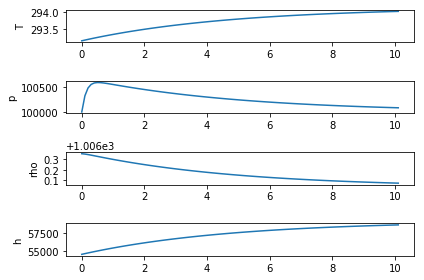

In [4]:
ts_lin_heat,ls_lin_heat = bt.run_one_simulation('water_lg',
        'Poly_1,7', 'Linear_Liquid_Heat',verbose=False)
print(ts_lin_heat[-1:,:])
print(bt.Linear_Liquid_Heat.answer)
plot_all_vs_t(ts_lin_heat)

## Hot Gas

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Poly_1,7/final_variables
Found point at  [[4.50000000e+02 5.00000000e+05 6.32963860e+00 2.79653187e+06]]  after  2  iterations.
100.0 132 1.2288403548152338e-11
200.0 83 1.7075814939078247e-07
300.0 76 1.817692312368255e-08
400.0 79 1.6352331401380485e-13
500.0 93 1.7685604876032165e-13
Failed to converge at t= 600.0  |Dq| was  4.162997190794944  after  499  iterations; quiting.


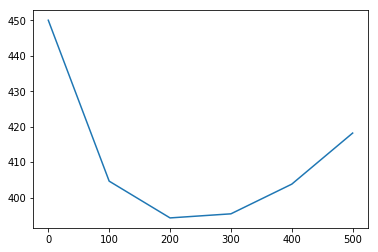

[[ 5.00000000e+02 -8.04849263e-02  1.08508468e-02  4.18199209e+02
   4.88075297e+05  4.30791221e+02  1.74407761e+06]]


In [4]:
ts,ls = bt.run_one_simulation('water_lg','Poly_1,7',
                      'Hot_Gas',verbose=True)
plt.plot(ts[:,0],ts[:,3])
plt.show()
print(ts[-1:,:])

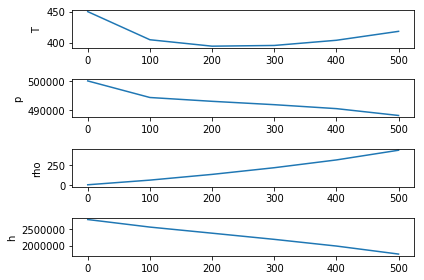

In [5]:
plot_all_vs_t(ts)

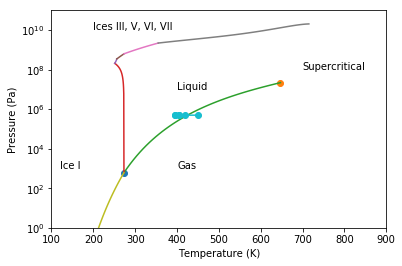

In [6]:
plot_boundaries()
plt.semilogy(ts[:,3],ts[:,4],'-o')

In [15]:
iapws97.density_region2(450,5e5)
iapws97.enthalpy_region2(450,5e5)

array(2805485.15379731)

In [11]:
bt.Hot_Gas.answer

{'T': 550,
 'h': array(2805485.15379731),
 'p': 500000.0,
 'rho': array(2.49130007)}

## Small Gas

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Poly_1,7/final_variables
Found point at  [[3.50000000e+02 5.00000000e+03 1.03628033e+01 2.62027117e+06]]  after  3  iterations.
10.0 23 2.0639932602950695e-08
20.0 17 3.7957647543740385e-12
30.0 18 1.7506593468983392e-12
40.0 19 1.4235297753528034e-11
50.0 21 1.50116486606359e-11
60.0 25 7.639526848376651e-11
Failed to converge at t= 70.0  |Dq| was  0.1685628703610825  after  499  iterations; quiting.


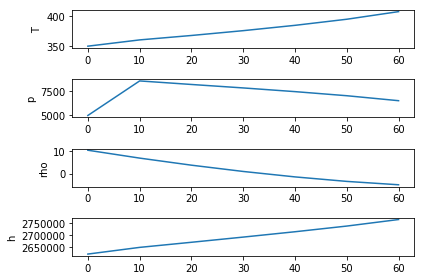

In [7]:
ts_small_gas,ls_small_gas = bt.run_one_simulation('water_lg','Poly_1,7',
                      'Small_Gas',verbose=True)
plot_all_vs_t(ts_small_gas)

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_slgc_logp_64/Poly_2,7/final_variables
Found point at  [[3.50000000e+02 5.00000000e+03 2.22384004e+01 2.60310515e+06]]  after  3  iterations.
10.0 27 2.400029625801668e-11
20.0 9 4.92049963992799e-13
30.0 9 5.862648843165571e-12
40.0 9 2.002503551210904e-12
50.0 9 2.5236119675800184e-13
60.0 8 3.295708901389189e-09
70.0 8 4.749124070211614e-12
80.0 8 1.343419034437492e-13
90.0 7 1.356713870741946e-11
100.0 7 5.152354403850531e-13
110.0 6 1.9772275463556854e-11
120.0 6 7.342864637678688e-13
130.0 5 2.461890935070451e-11
140.0 5 1.2500625389784675e-12
150.0 4 3.8978725584137705e-11
160.0 4 4.42511401863091e-12
170.0 3 1.1948852635065408e-07
180.0 3 2.5179387771709424e-11
190.0 3 4.656747685711103e-12
200.0 3 3.8841055805064116e-13
210.0 2 2.106049837463729e-08
220.0 2 3.307923331381781e-11
230.0 2 1.5401606138480962e-11
240.0 2 7.053913907834289e-12
250.0 2 3.1862134675832785e-12
260.0 2 1.4254015763

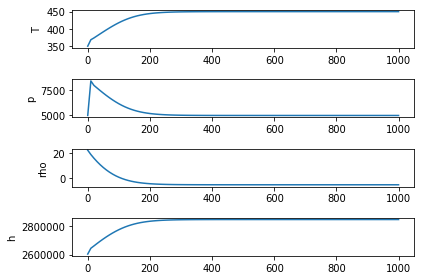

In [12]:
ts_small_gas_slgc,ls_small_gas_slgc = bt.run_one_simulation(
    'water_slgc_logp_64','Poly_2,7',
                      'Small_Gas',verbose=True)
plot_all_vs_t(ts_small_gas_slgc)

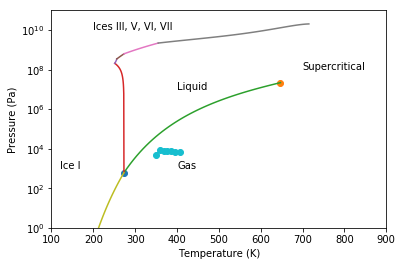

In [8]:
plot_boundaries()
plt.semilogy(ts_small_gas[:,3],ts_small_gas[:,4],'-o')

## Transition Liquid to Gas

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Poly_1,7/final_variables
Found point at  [[3.50000000e+02 5.00000000e+05 9.75399728e+02 3.20459230e+05]]  after  2  iterations.


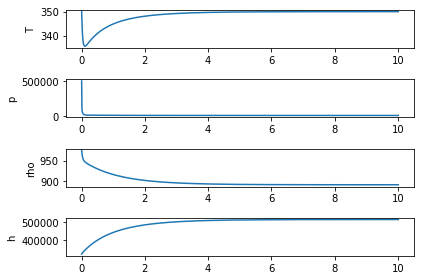

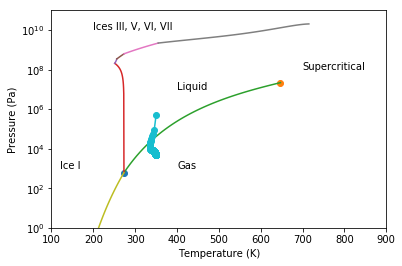

In [2]:
ts_l2g,ls_l2g = bt.run_one_simulation('water_lg','Poly_1,7',
                      'Transition_L2G',verbose=False)
plot_all_vs_t(ts_l2g)
plot_boundaries()
plt.semilogy(ts_l2g[:,3],ts_l2g[:,4],'-o')

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_slgc_logp_64/Classifying_2,4,12,24,sigmoid/final_variables
Found point at  [[3.50000000e+02 5.00000000e+05 9.73170575e+02 3.24121968e+05]]  after  3  iterations.
Failed to converge at t= 2.949999999999981  |Dq| was  6.939751791931532  after  499  iterations; quiting.


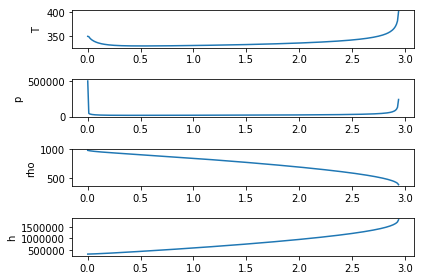

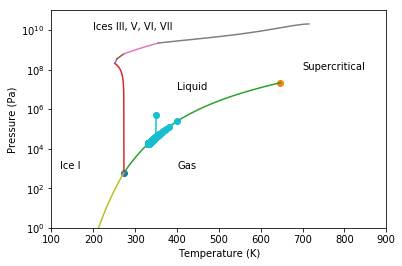

In [24]:
ts_l2g_s,ls_l2g_s = bt.run_one_simulation(
    'water_slgc_logp_64','Classifying_2,4,12,24,sigmoid',
                      'Transition_L2G',verbose=False)
plot_all_vs_t(ts_l2g_s)
plot_boundaries()
plt.semilogy(ts_l2g_s[:,3],ts_l2g_s[:,4],'-o')

In [33]:
np.e

2.718281828459045

In [38]:
def eval_path_via_inversion(ls, T1,p1, T2,p2):
    states=[]
    ss = np.linspace(0.0,1.0,50)
    for s in ss:
        try:
            print(p1*(1.0-(np.exp(s)-1)/(np.e-1) )  + p2*((np.exp(s)-1)/(np.e-1)))
            q0 = ls.find_point(T=T1*(1.0-s)+T2*s, p=p1*(1.0-(np.exp(s)-1)/(np.e-1) )  + p2*((np.exp(s)-1)/(np.e-1)) )
            state = ls.decode(q0)
            states.append(state)
        except:
            pass
    return np.vstack(states)
def eval_path_via_latent_space(ls, T1,p1, T2,p2):
    states=[]
    ss = np.linspace(0.0,1.0,50)
    q1 = ls.find_point(T=T1, p=p1)
    q2 = ls.find_point(T=T2, p=p2)
    for s in ss:
        try:
            state = ls.decode(q1*(1.0-s)+q2*s)
            states.append(state)
        except:
            pass
    return np.vstack(states)
def plot_contour(ls, problem,method='inversion',xidx=1,yidx=2):
    if method=='inversion':
        states = eval_path_via_inversion(ls, problem.initial['T'],problem.initial['p'],
                          problem.answer['T'],problem.answer['p'])
    else:
        states = eval_path_via_latent_space(ls, problem.initial['T'],problem.initial['p'],
                          problem.answer['T'],problem.answer['p'])
    plt.semilogx(states[:,xidx],states[:,yidx],'+-',label=ls.model_name)
    
    return states


500000.0
Found point at  [[3.91094283e+02 4.52662496e+05 1.81389750e+02 2.26641770e+06]]  after  199  iterations.
But that point was far away.
494060.4460064303
Found point at  [[3.90629101e+02 4.47241676e+05 1.79238956e+02 2.27087467e+06]]  after  199  iterations.
But that point was far away.
487998.4312761913
Found point at  [[3.90154074e+02 4.41701666e+05 1.77044523e+02 2.27542649e+06]]  after  199  iterations.
But that point was far away.
481811.430934176
Found point at  [[3.89668957e+02 4.36039108e+05 1.74805595e+02 2.28007510e+06]]  after  199  iterations.
But that point was far away.
475496.8680478224
Found point at  [[3.89173482e+02 4.30250340e+05 1.72521302e+02 2.28482248e+06]]  after  199  iterations.
But that point was far away.
469052.1125538007
Found point at  [[3.88667346e+02 4.24331305e+05 1.70190759e+02 2.28967059e+06]]  after  199  iterations.
But that point was far away.
462474.48016257345
Found point at  [[3.88150201e+02 4.18277421e+05 1.67813066e+02 2.29462138e+06]]

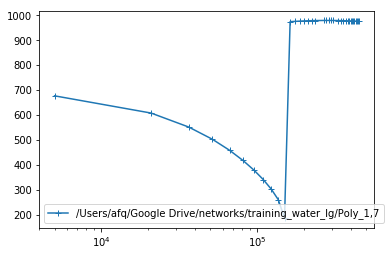

In [40]:
plot_contour(ls_l2g,bt.Transition_L2G,method='inversion')
plt.legend()

500000.0
Found point at  [[3.50000000e+02 5.00000000e+05 9.73170575e+02 3.24121968e+05]]  after  7  iterations.
494060.4460064303
Found point at  [[3.50000000e+02 4.94060446e+05 9.73148846e+02 3.24096939e+05]]  after  7  iterations.
487998.4312761913
Found point at  [[3.50000000e+02 4.87998431e+05 9.73126312e+02 3.24070410e+05]]  after  7  iterations.
481811.430934176
Found point at  [[3.50000000e+02 4.81811431e+05 9.73102940e+02 3.24042260e+05]]  after  7  iterations.
475496.8680478224
Found point at  [[3.50000000e+02 4.75496868e+05 9.73078696e+02 3.24012354e+05]]  after  7  iterations.
469052.1125538007
Found point at  [[3.50000000e+02 4.69052113e+05 9.73053546e+02 3.23980544e+05]]  after  7  iterations.
462474.48016257345
Found point at  [[3.50000000e+02 4.62474480e+05 9.73027455e+02 3.23946665e+05]]  after  7  iterations.
455761.23124036746
Found point at  [[3.50000000e+02 4.55761231e+05 9.73000386e+02 3.23910535e+05]]  after  7  iterations.
448909.56966809597
Found point at  [[3.5

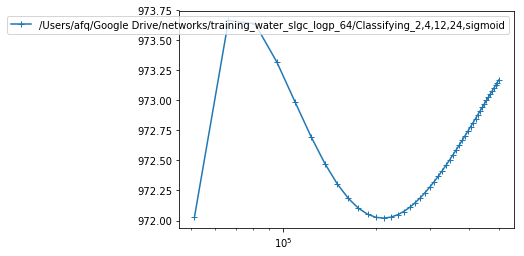

In [39]:
# plot_contour(ls_l2g,bt.Transition_L2G,method='inversion')
plot_contour(ls_l2g_s,bt.Transition_L2G,method='inversion')
plt.legend()